In [1]:
###############################################
# Load some useful modules
###############################################

import os,sys

#for netcdf files
from netCDF4 import Dataset

#for numeric functions
import numpy as np
import numpy.ma as ma

#plotting functions
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter


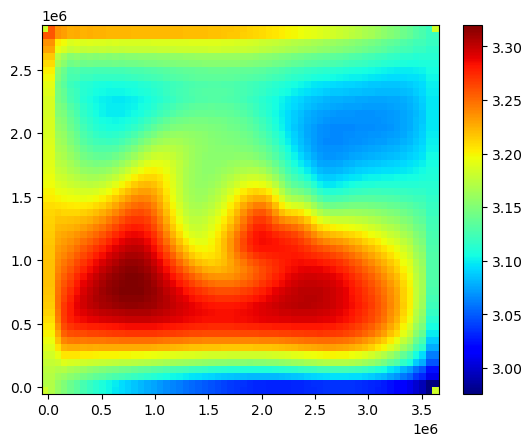

In [8]:
#################################################
# Load data from grid file
#################################################

ncfile='2122/case_seamount/basin_his.nc'

#open netcdf file
nc = Dataset(ncfile, 'a')

#Load a 4d variable (default coordinates order= t,z,y,x)
lon=np.array(nc.variables['x_rho'])
lat=np.array(nc.variables['y_rho'])
#mask=np.array(nc.variables['mask_rho'])
#mask[mask==0.] = np.nan

#close netcdf file
nc.close()


#################################################
# Load data from netcdf file
#################################################


#open netcdf file
nc = Dataset(ncfile, 'r')

#Load SST at last time-step (default coordinates order= t,z,y,x)
temp=np.array(nc.variables['temp'][-1,-1,:,:]) #* mask


#close netcdf file
nc.close()


#################################################
# Plot  data
#################################################

# Create a contour plot with 100 levels
plt.pcolormesh(lon,lat,ma.masked_invalid(temp),cmap=plt.cm.jet); 

# plot colorbar
plt.colorbar()

# Save it as a .png file
plt.savefig( 'image.png'); 

# Show figure
plt.show()

In [9]:
# some tools to interpolate croco outputs vertically

import tools as to

In [17]:
###################################################################################
#Load variables and parameters 
###################################################################################

nc = Dataset(ncfile, 'r')

temp3d=np.array(nc.variables['temp'][-1,:,:,:])


#Load some parameters

zeta=nc.variables['zeta'][-1,:,:]
topo=nc.variables['h'][:]
pm=nc.variables['pm'][:]
pn=nc.variables['pn'][:]

hc = nc.hc
Cs_r = nc.Cs_r
Cs_w = nc.Cs_w

#close netcdf file
nc.close()

###################################################################################
#Compute vertical coordinates 
###################################################################################

(z_r,z_w) =  to.zlevs(topo,zeta, hc, Cs_r, Cs_w)

###################################################################################
#Interpolate a variable on a given depth
###################################################################################

t_depth= to.vinterp(temp3d,z_r,-2500,topo=topo,cubic=1)

cubic interpolation


/tmp/ipykernel_349543/1267852961.py:10: UserWarning: No contour levels were found within the data range.
  plt.contour(lon,lat,topo,[500,1000,2000,5000],colors='k');


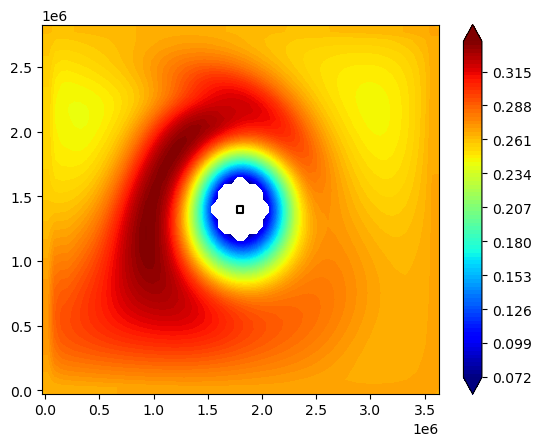

In [19]:
#################################################
# Plot  data
#################################################

# Create a contour plot with 100 levels
plt.contourf(lon,lat,t_depth,100,cmap=plt.cm.jet,extend='both'); 
plt.colorbar()

# plot topography contours
plt.contour(lon,lat,topo,[500,1000,2000,5000],colors='k'); 

# Save it as a .png file
#plt.savefig( 'image.png',  magnification='auto',bbox_inches='tight', dpi=300); 

# Show figure
plt.show()
